# Programming Assignment 3 - Predicting Closing Costs With Google Stock Prices

---

Author: Taylor Larrechea

Class: CSPB 4622 - Machine Learning

Professor: Dr. Hoang Truong

Due Date: 12/9/2024

## Project Topic

---

This project aims to train a deep learning model to predict the closing price of Google stock based on historical stock prices. The key problem that is present is that the stock market is a highly volatile and unpredictable environment. Along with this, training a deep learning model to predict stock prices can be difficult due to the high dimensionality of the data and the non-linear relationships between the features and the target variable as well as other factors.

The motivation behind this project is to create a model that can accurately predict the closing price of Google stock based on historical stock prices so that others can use this model to make informed decisions about buying or selling Google stock. If a model like this can be developed for Google, it could possibly be adapted for other stocks as well.

The dataset for this project can be found [here.](https://www.kaggle.com/datasets/rahulsah06/gooogle-stock-price?resource=download&select=Google_Stock_Price_Test.csv)

## Dataset

---

The data that was provided for this project consists of two CSV files:

- Test.csv: This file contains the test data that will be used to evaluate the model.
- Train.csv: This file contains the training data that will be used to train the model.

Both CSV files contain the following columns:

- Date: The date of the stock price.
- Open: The opening price of the stock on that day.
- High: The highest price of the stock on that day.
- Low: The lowest price of the stock on that day.
- Close: The closing price of the stock on that day.
- Volume: The volume of the stock on that day.

The training file contains 1258 rows and the test file contains 20 rows. This means that the model will be trained on 1258 days of stock prices and then evaluated on 20 days of stock prices.

In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

# Load Data

training_data = pd.read_csv('Data/Train.csv')
testing_data = pd.read_csv('Data/Test.csv')

# Display Data

print("\nTrain Dataset Info:")
print(training_data.info())

print("\nTest Dataset Info:")
print(testing_data.info())

print("\nTrain Dataset Description:")

print(training_data.describe())

print("\nTest Dataset Description:")

print(testing_data.describe())

print("\nTrain Dataset Head:")

print(training_data.head())

print("\nTest Dataset Head:")

print(testing_data.head())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB
None

Train Dataset Description:
              Op

## EDA

---

Now that we have the dataset, the next is to do some Exploratory Data Analysis (EDA) to understand the data better. We first begin by producing distribution and box plots for the Open, High, Low, Close, and Volume columns. Distribution plots were created so that we can see the distribution of the data and box plots were created so that we can see the spread of the data. Lastly, a correlation matrix was created to see how the features are correlated with each other.

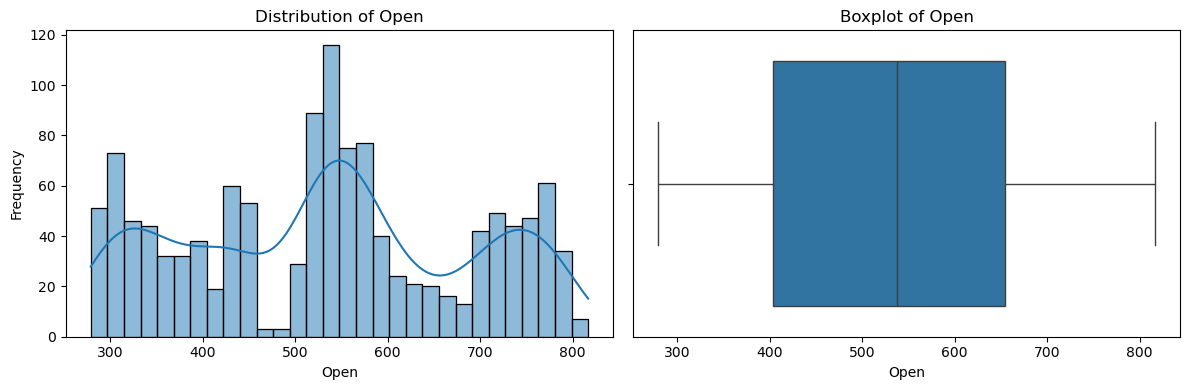

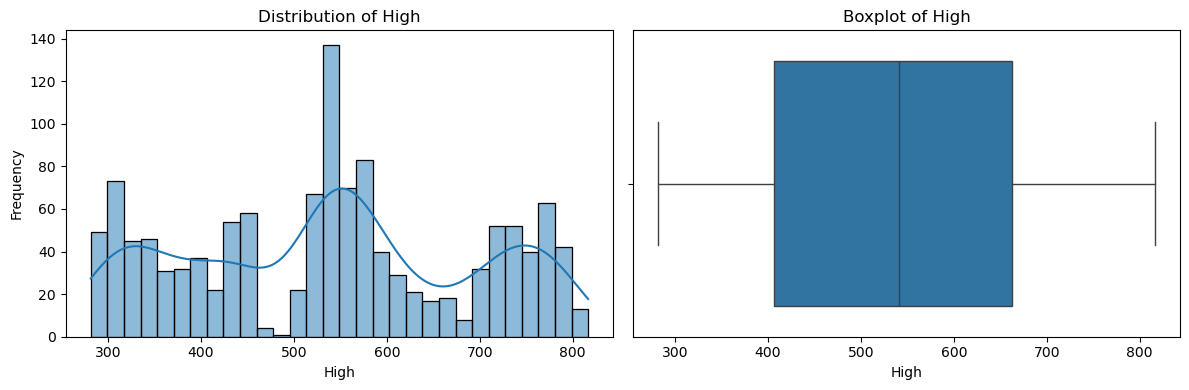

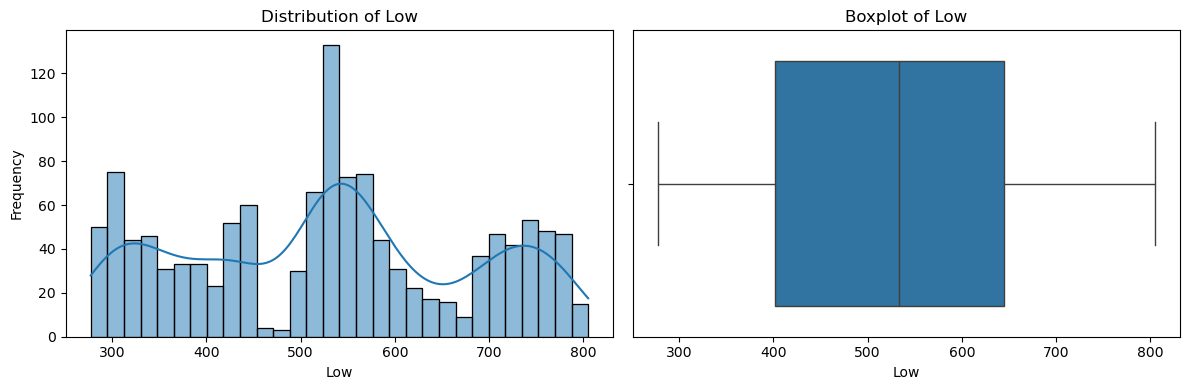

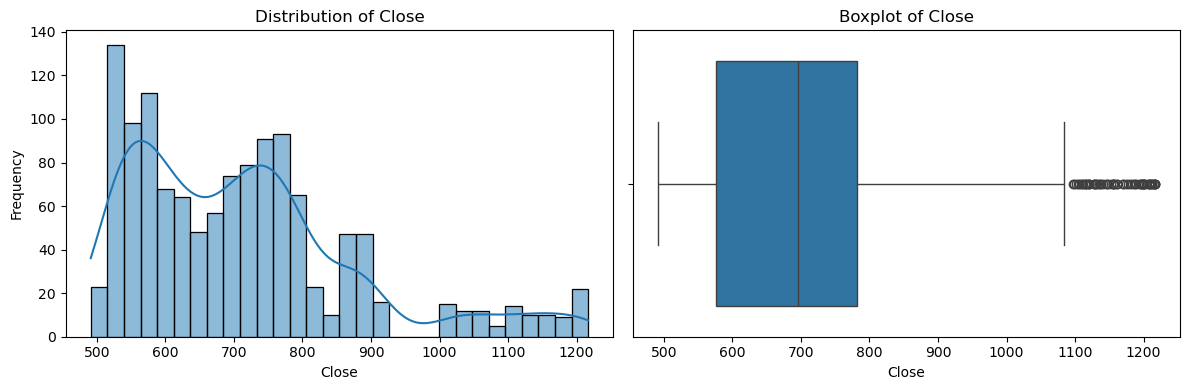

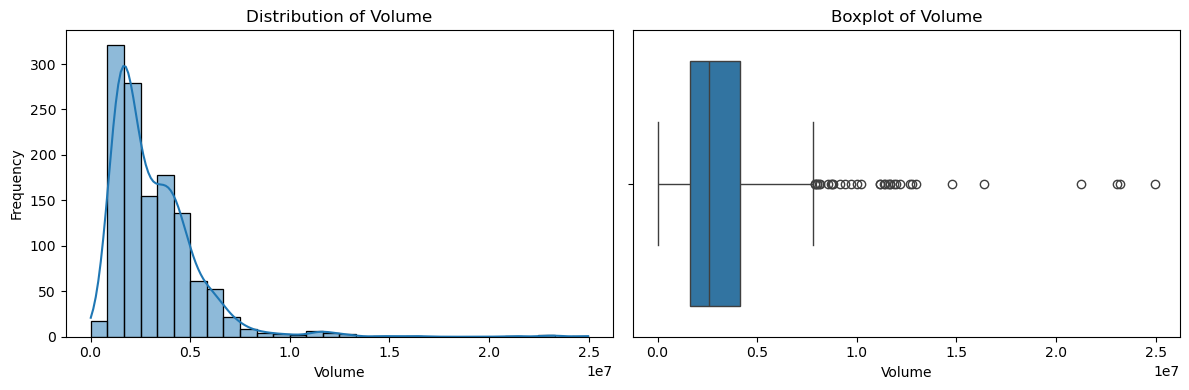

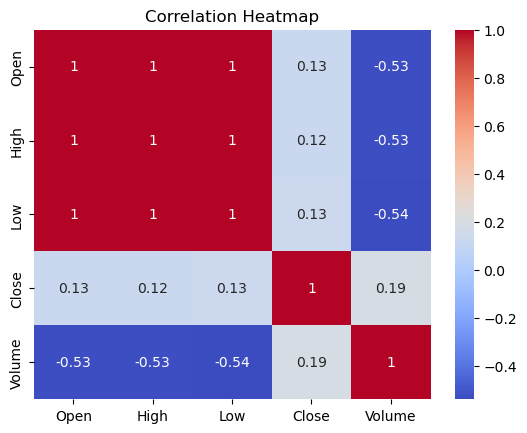

In [8]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Ensure 'Date' column is not included in the conversion
training_data['Close'] = training_data['Close'].astype(str).str.replace(',', '').astype(float)
training_data['Volume'] = training_data['Volume'].astype(str).str.replace(',', '').astype(float)

# Distribution and Boxplots
for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    
    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(training_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=training_data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    # Show combined plot
    plt.tight_layout()
    plt.show()

# Correlation heatmap
sns.heatmap(training_data.drop('Date', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

From the results above, if we are trying to predict the closing price of Google stock, it appears that the Volume and Open along with Low have the highest correlation with the closing price. From the results that we have, we can then decide to create a couple of models with different features to see which one performs the best. The models that we are going to create are:

- Model 1: Using all features
- Model 2: Using only the Open, Low, and Volume features
- Model 3: Using only the Volume and Open features
- Model 4: Using only the Open and Low features

We now are going to create these models and will evaluate them after.

## Model

---

The models that are going to be created with a fully connected feedforward nueral network (FNN) or also known as Multilayer Perceptron (MLP). These model types are good for regression problems like the one that we have because they can learn complex non-linear relationships between the features and the target variable. A basic architecture for the each individual model was created for easy use and evaluation.

In [ ]:
# Dictionary to store the features for each model
features_dictionary = {
    "Model1": training_data.columns.drop(['Date', 'Close']),
    "Model2": training_data.columns.drop(['Date', 'Close', 'High']),
    "Model3": training_data.columns.drop(['Date', 'Close', 'High', 'Low']),
    "Model4": training_data.columns.drop(['Date', 'Close', 'High', 'Low', 'Open']),
}

# Split the data into features and target
X = training_data.drop(['Date', 'Close'], axis=1)
Y = training_data['Close']

# Normalize the data
scaler = MinMaxScaler()
Scaled_X = scaler.fit_transform(X)

# Map column names to indices for feature selection
column_indices = {col: idx for idx, col in enumerate(X.columns)}

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(Scaled_X, Y, test_size=0.2, random_state=42)

# Base Model Class
class DeepLearningModel:
    def __init__(self, model_name, selected_features):
        self.model_name = model_name
        self.selected_features = selected_features
        self.feature_indices = [column_indices[f] for f in selected_features]
        self.model = self._build_model(len(self.feature_indices))

    def _build_model(self, input_dim):
        model = Sequential([
            Dense(64, activation='relu', input_dim=input_dim),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(1, activation='linear')  # Assuming a regression task
        ])
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    def train(self, X_train, y_train, epochs=50, batch_size=32, validation_split=0.1):
        # Select features for the current model
        X_train_selected = X_train[:, self.feature_indices]
        self.history = self.model.fit(
            X_train_selected, y_train,
            epochs=epochs, batch_size=batch_size,
            validation_split=validation_split, verbose=1
        )

    def evaluate(self, X_test, y_test):
        X_test_selected = X_test[:, self.feature_indices]
        return self.model.evaluate(X_test_selected, y_test, verbose=0)

# Each model
models = {}
for name, features in features_dictionary.items():
    models[name] = DeepLearningModel(name, features)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model 1 - Every Feature Except For Date

---

In [ ]:
model1 = models['Model1']
model1.train(X_train, Y_train)
m1loss, m1mae = model1.evaluate(X_test, Y_test)
print(f"Model1: Loss={m1loss}, MAE={m1mae}")

Epoch 1/50


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28370.3203 - mae: 126.5642 - val_loss: 22948.7051 - val_mae: 109.4151
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25600.8652 - mae: 119.6071 - val_loss: 23122.9238 - val_mae: 111.1534
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29785.6758 - mae: 127.1262 - val_loss: 22962.2676 - val_mae: 109.8654
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24981.5664 - mae: 116.6116 - val_loss: 22882.4512 - val_mae: 109.0003
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26943.7832 - mae: 123.7986 - val_loss: 23011.4824 - val_mae: 110.4552
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27853.3359 - mae: 124.6374 - val_loss: 23013.8984 - val_mae: 110.5030
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26416.4023 - mae: 120.9619 - val_loss: 23024.7480 - val_mae: 110.6226
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26680.4160 - mae: 123.8184 - val_loss: 22992.4609 - val_m

## Model 2 - Open, Low, and Volume

---

In [23]:
model2 = models['Model2']
model2.train(X_train, Y_train)
m2loss, m2mae = model2.evaluate(X_test, Y_test)
print(f"Model2: Loss={m2loss}, MAE={m2mae}")

Epoch 1/50


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28812.0938 - mae: 132.7459 - val_loss: 25141.5898 - val_mae: 128.1075
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25018.9824 - mae: 123.9633 - val_loss: 24909.5059 - val_mae: 126.3309
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28974.1172 - mae: 131.0616 - val_loss: 24743.3594 - val_mae: 125.3700
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28234.8984 - mae: 132.7963 - val_loss: 24537.8340 - val_mae: 123.6904
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26673.2070 - mae: 126.7331 - val_loss: 24366.0000 - val_mae: 122.2310
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28965.2559 - mae: 129.6909 - val_loss: 24258.4570 - val_mae: 121.6341
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28853.4512 - mae: 131.3919 - val_loss: 24069.1660 - val_mae: 119.3996
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28721.3281 - mae: 128.5680 - val_loss: 23962.7988 - val_m

## Model 3 - Open and Volume

---

In [24]:
model3 = models['Model3']
model3.train(X_train, Y_train)
m3loss, m3mae = model3.evaluate(X_test, Y_test)
print(f"Model3: Loss={m3loss}, MAE={m3mae}")

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 534739.8125 - mae: 711.7370 - val_loss: 519191.2188 - val_mae: 704.2909
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 538378.6875 - mae: 713.7792 - val_loss: 516197.2188 - val_mae: 702.1772
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 532242.6875 - mae: 709.5441 - val_loss: 509407.3125 - val_mae: 697.3585
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 525493.4375 - mae: 705.5302 - val_loss: 496545.0000 - val_mae: 688.1323
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 498449.5938 - mae: 687.9258 - val_loss: 475374.3438 - val_mae: 672.6631
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 480538.4375 - mae: 673.4208 - val_loss: 444301.1875 - val_mae: 649.2700
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 440878.5938 - mae: 645.4056 - val_loss: 402918.4688 - val_mae: 616.7004
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 398694.5938 - mae: 609.5698 - va

## Model 4 - Open and Low

---

In [25]:
model4 = models['Model4']
model4.train(X_train, Y_train)
m4loss, m4mae = model4.evaluate(X_test, Y_test)
print(f"Model4: Loss={m4loss}, MAE={m4mae}")

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 522854.9375 - mae: 705.0274 - val_loss: 520071.4062 - val_mae: 704.9104
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 536846.8750 - mae: 713.8518 - val_loss: 518864.5625 - val_mae: 704.0608
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 537043.1875 - mae: 712.9481 - val_loss: 516101.6875 - val_mae: 702.1096
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 536468.0625 - mae: 712.8058 - val_loss: 510775.6875 - val_mae: 698.3300
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 516571.0312 - mae: 700.8719 - val_loss: 501823.9062 - val_mae: 691.9273
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 508882.7500 - mae: 694.7305 - val_loss: 488299.0625 - val_mae: 682.1353
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 492150.3438 - mae: 683.1104 - val_loss: 469354.0625 - val_mae: 668.1716
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 488359.4688 - mae: 678.7653 - va

## Evaluation

---

Now that we have trained our models, we can evaluate them and see which model performed the best. For starters, here were the shared parameters for all models that were trained:

- Model Type: Fully Connected Feedforward Neural Network
- Optimizer: Adam
- Epochs: 50
- Batch Size: 32
- Validation Split: 0.1
- Loss Function: Mean Squared Error
- Metrics: Mean Absolute Error

The Mean Squared Error was chosen for the loss function because it is typically a good choice for regression models. The Mean Absolute Error was chosen for the metrics because it is easy to interpret and understand. Each model was trained under these same parameters but with different features. The results for each model can be seen in the table below:

| Model | Mean Squared Error | Mean Absolute Error |
|-------|--------------------|---------------------|
| 1     | 26112.140625          |     117.92471313476562      |
| 2     | 25806.84765625          |     117.37318420410156      |
| 3     | 27664.771484375          |     129.22500610351562      |
| 4     | 28335.056640625          |     132.73684692382812      |

From this, we can see that the model that had the lowest Mean Squared Error was Model 2 with a value of 25806.84765625. This model also had the lowest Mean Absolute Error as well. This means that Model 2 is the best model out of the four that were created. 

The model that performed the worst was Model 4 with a Mean Squared Error of 28335.056640625. This model also had the highest Mean Absolute Error as well. This means that Model 4 is the worst model out of the four that were created.

## Conclusion

---

The average mean squared error of the four models that were created is 26954.2041015625. The average mean absolute error of the four models came out to be 124.96466159820557. In terms of understanding these results, the mean squared error is a measure of how close the predictions are to the actual values. The mean absolute error is a measure of how far off the predictions are from the actual values. The lower the mean squared error and mean absolute error, the better the model is performing. In this case, Model 2 performed the best out of the four models that were created. This means that if we were to use a model to predict the closing price of Google stock, we would use Model 2.

Reasons for why the error rates are so high could be due to the high volatility of the stock market and the non-linear relationships between the features and the target variable. The stock market is a highly unpredictable environment and it can be difficult to predict stock prices with a high degree of accuracy. This is a potential reason as to why the error rates are so high.

Another reason for the high error could be due to the volume of data that was used to train the model and the volume of data that was used to evaluate the model. If more data could be collected for training and evaluation, the model could potentially perform better with the current architecture that was used.

Other factors include parameters that were used to train the model such as the number of epochs, batch size, and validation split. If these parameters were changed, the model could potentially perform better as well.

Further work could be done with different data sets and higher volume of data with potentially different features as well.